In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from label import label

In [2]:
from arch import arch_model
from statsmodels.tsa.arima.model import ARIMA


In [3]:
df = label("D:\\Project\\Bitcoin_Price_Prediction\\data\\binance-BTCUSDT-1m.csv", 15)

In [4]:
df.index = pd.to_datetime(df["Time_UTC_Start"])


# Extracting Relevant Series

In [5]:
# Create a new dataframe with one column - "spx"
data = pd.DataFrame(columns = ["spx"])
# Copy closing prices of S&P 500 to this new column
data["spx"] = df["Close"]
# Ensure that the dates are ordered in business week fashion (5 days a week)
data = data.asfreq('3600s')

In [6]:
data

,spx
Time_UTC_Start,
2018-07-18 10:39:00,7402.13
2018-07-18 11:39:00,7418.00
2018-07-18 12:39:00,7454.01
2018-07-18 13:39:00,7447.66
2018-07-18 14:39:00,7439.88
...,...
2022-05-07 03:39:00,35889.40
2022-05-07 04:39:00,35819.05
2022-05-07 05:39:00,35858.28


# Handling Missing Values

In [7]:
print("Null values - ",data.spx.isnull().sum())

print("\nStatistical Description of the series - ")
print(data.describe())

data.spx = data.spx.fillna(method='ffill')
print("\nNull values - ",data.spx.isnull().sum())

Null values -  234

Statistical Description of the series - 
                spx
count  33100.000000
mean   21779.470248
std    18823.778285
min     3162.070000
25%     7286.810000
50%    10339.245000
75%    39349.717500
max    68633.420000

Null values -  0


# Deriving S&P Returns and Volatility

In [8]:
# Calculating returns and volatility based on previous formulas
data["spx_ret"] = data.spx.pct_change(1).mul(100)
data["spx_vol"] = data.spx_ret.abs()

In [9]:
data.head()

,spx,spx_ret,spx_vol
Time_UTC_Start,,,
2018-07-18 10:39:00,7402.13,NaN,NaN
2018-07-18 11:39:00,7418.00,0.214398,0.214398
2018-07-18 12:39:00,7454.01,0.485441,0.485441
2018-07-18 13:39:00,7447.66,-0.085189,0.085189
2018-07-18 14:39:00,7439.88,-0.104462,0.104462


# Preliminary Line Plots

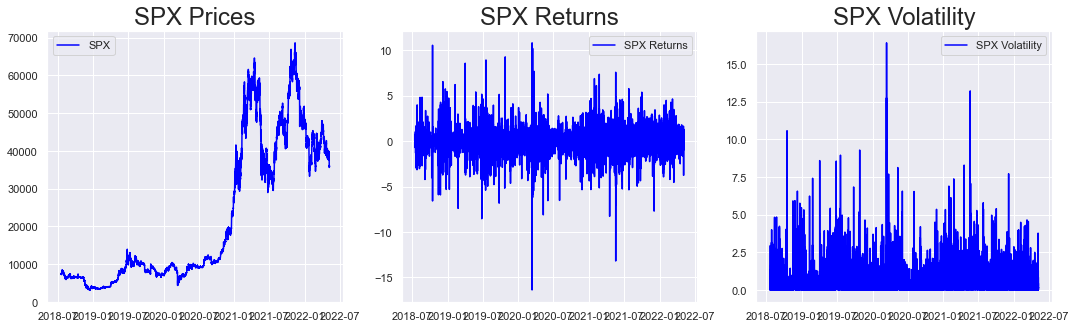

In [10]:
# Setting the figure size 
plt.rcParams["figure.figsize"] = (18, 5)

# Subdividing the figure into 3 figures stacked in 1 row
fig, ax = plt.subplots(1, 3)

# First Plot - S&P 500 prices against time
ax[0].plot(data.spx, color = "blue", label = "SPX")
ax[0].set_title("SPX Prices", size = 24)
ax[0].legend()

# Second Plot - S&P 500 returns against time
ax[1].plot(data.spx_ret, color = "blue", label = "SPX Returns")
ax[1].set_title("SPX Returns", size = 24)
ax[1].legend()

# Third Plot - S&P 500 volatility against time
ax[2].plot(data.spx_vol, color = "blue", label = "SPX Volatility")
ax[2].set_title("SPX Volatility", size = 24)
ax[2].legend()

# Used to display the plot free from any additional text in Jupyter notebooks
plt.show()

# Splitting Time Series Data into Train-Test sets

In [11]:
size = int(data.shape[0]*0.95)

In [12]:
train_df = data[:size]
test_df = data[size:]

print("Training Set Shape - ", train_df.shape)
print("Testing Set Shape - ", test_df.shape)

Training Set Shape -  (31667, 3)
Testing Set Shape -  (1667, 3)


# Exploring Monthly Trends using Box Plots

C:\Users\Nguyen The Minh Duc\AppData\Local\Temp\ipykernel_17772\501565308.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df["Month"] = train_df.index.month


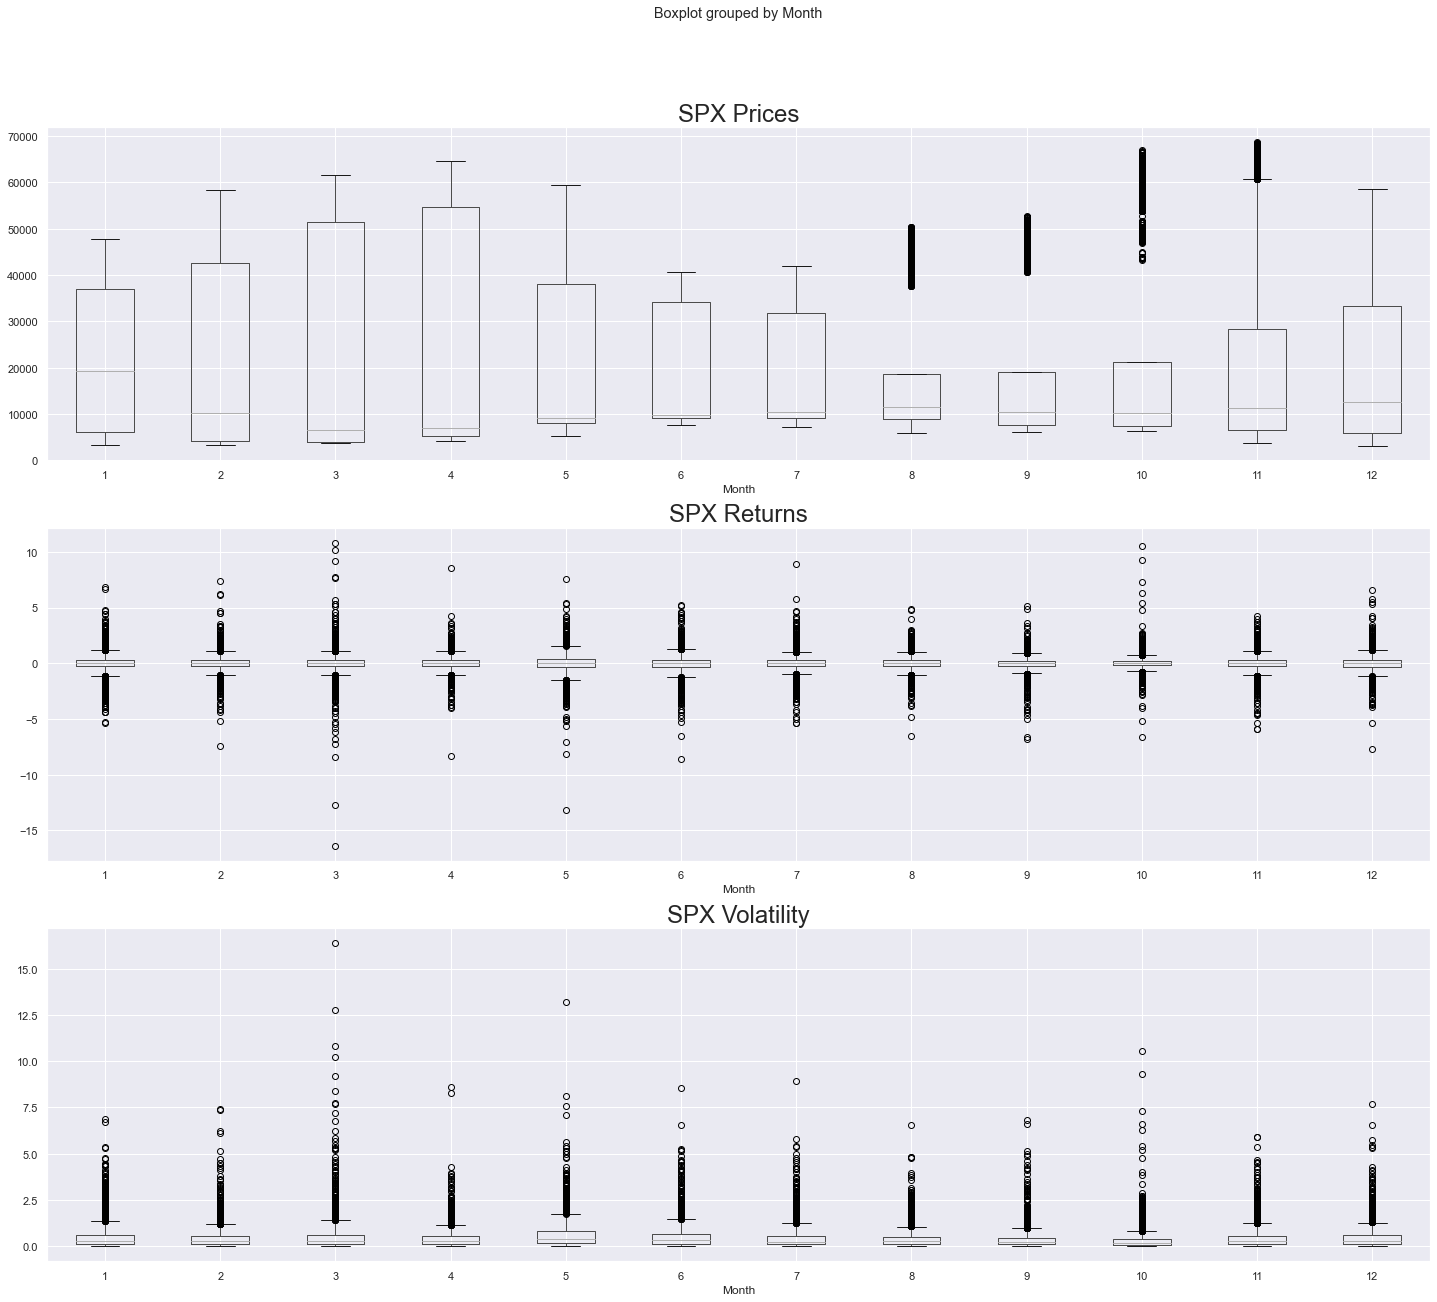

In [13]:
# Adding another column in train_df storing the "Year" of each observation
train_df["Month"] = train_df.index.month

# Setting the size of the figure 
plt.rcParams["figure.figsize"] = 24, 21

# Defining 3 subplots
fig, axes = plt.subplots(3, 1)

# First Boxplot: Yearly S&P 500 Prices
train_df.boxplot(by ='Month', column =['spx'], ax = axes[0])
axes[0].set_title("SPX Prices", size = 24)

# Second Boxplot: Yearly S&P 500 Returns
train_df.boxplot(by ='Month', column =['spx_ret'], ax = axes[1])
axes[1].set_title("SPX Returns", size = 24)

# Third Boxplot: Yearly S&P 500 Volatility
train_df.boxplot(by ='Month', column =['spx_vol'], ax = axes[2])
axes[2].set_title("SPX Volatility", size = 24)

# Displaying plots
plt.show()

# Distribution of Data

C:\Users\Nguyen The Minh Duc\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Nguyen The Minh Duc\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Nguyen The Minh Duc\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future v

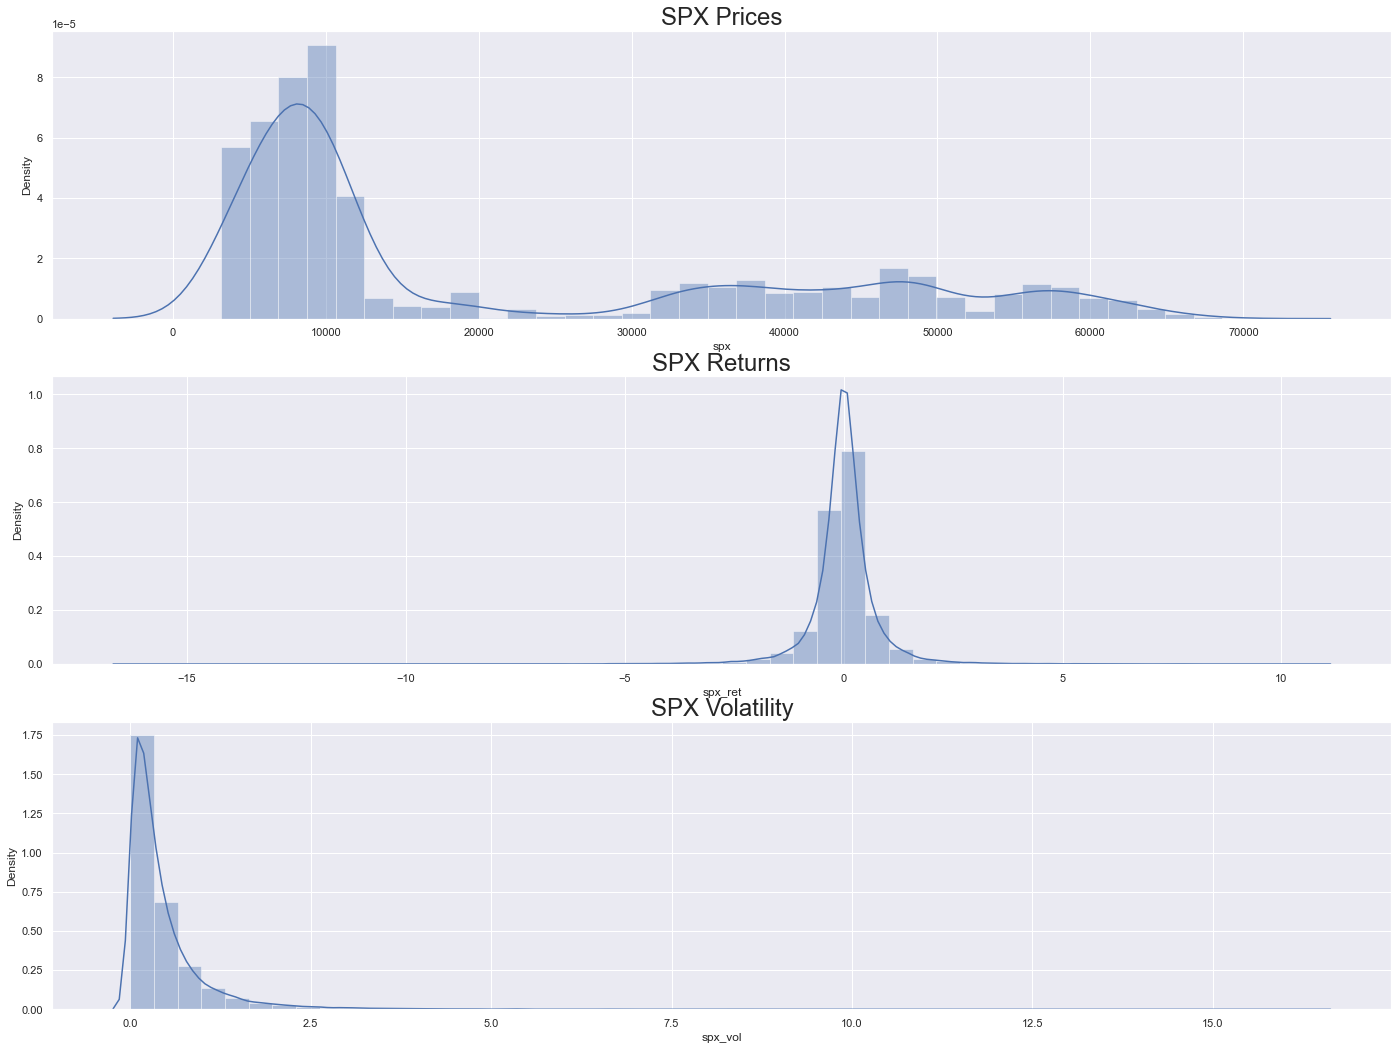

In [14]:
# Setting the figure size
plt.rcParams["figure.figsize"] = 24, 18

# Defining 3 subplots one below the other
fig, axes = plt.subplots(3, 1)

# Plotting the distributions in the respective subplots
sns.distplot(train_df.spx, ax = axes[0])
sns.distplot(train_df.spx_ret, ax = axes[1])
sns.distplot(train_df.spx_vol, ax = axes[2])

# Setting the title for each subplot
axes[0].set_title("SPX Prices", size = 24)
axes[1].set_title("SPX Returns", size = 24)
axes[2].set_title("SPX Volatility", size = 24)

# Displaying the plot
plt.show()

# Data Decomposition (Additive and Multiplicative)

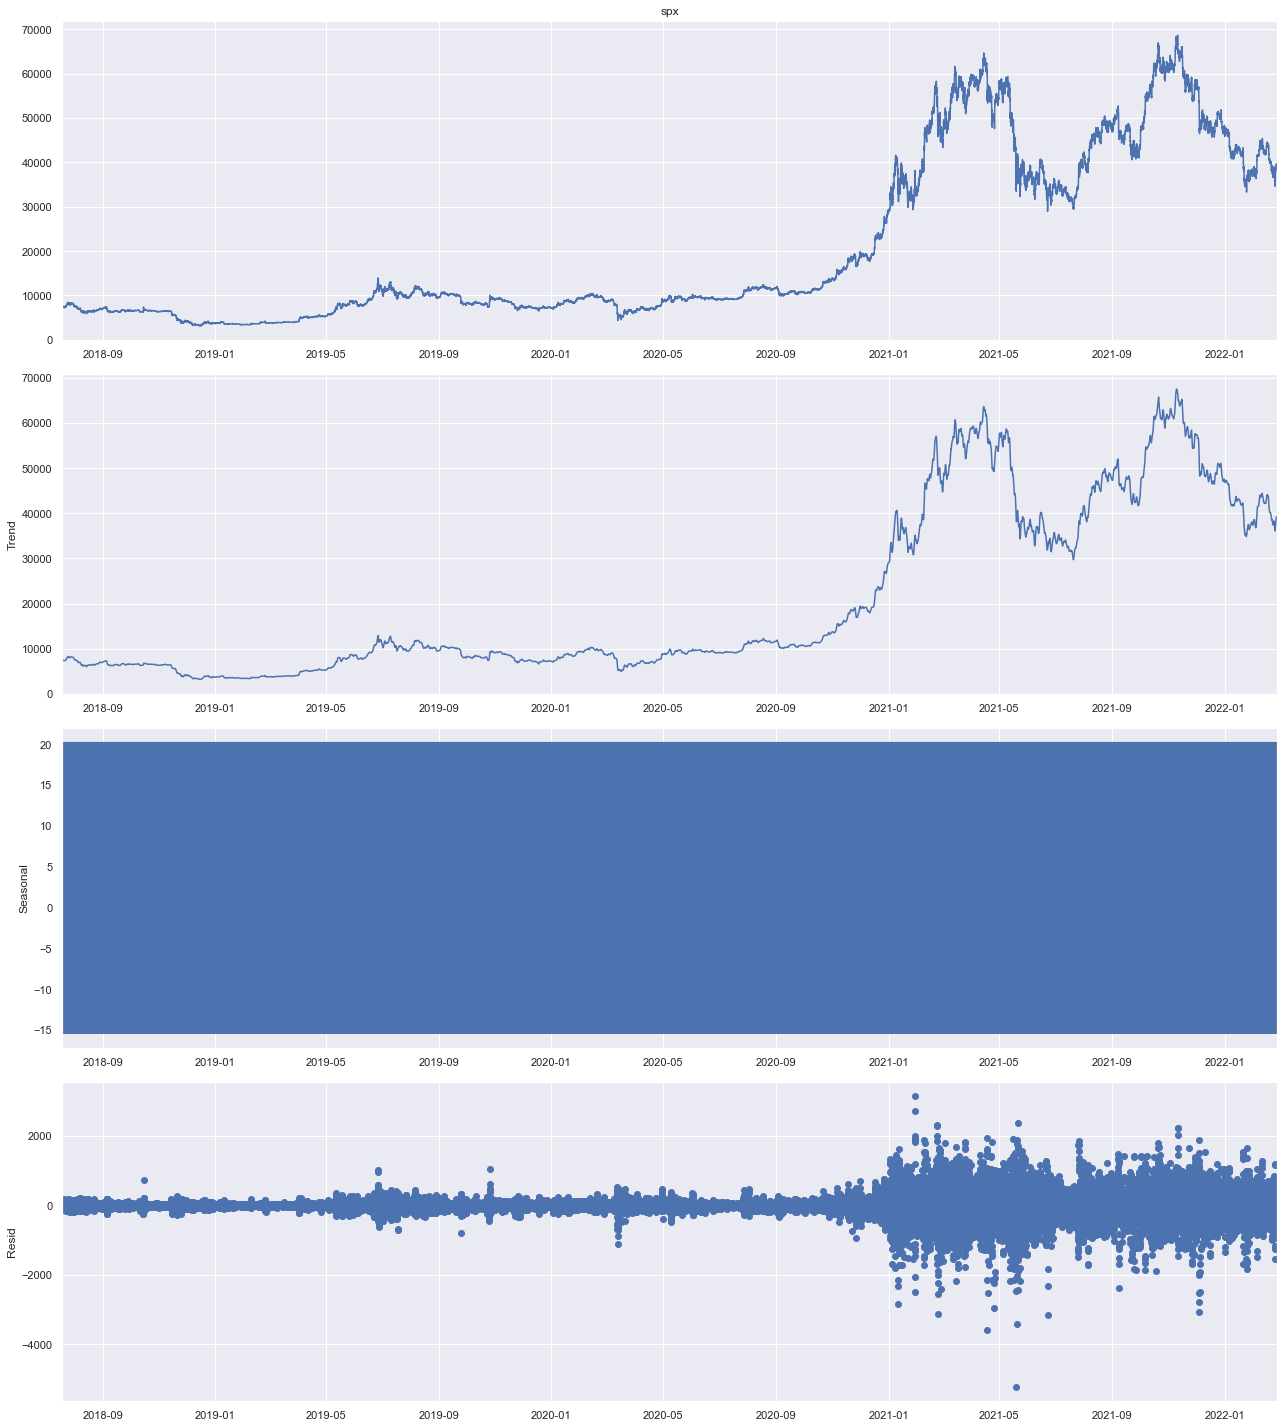

In [15]:
# Import the required package
from statsmodels.tsa.seasonal import seasonal_decompose

# Set Plot size
plt.rcParams["figure.figsize"] = 18, 20

# Call the seasonal_decompose method to decompose the data using the "additive" model 
result = seasonal_decompose(train_df.spx, model='additive')

# Un-comment these lines for additive decomposition of S&P 500 Returns and Volatility respectively
# result = seasonal_decompose(train_df.spx_ret[1:], model='additive')
# result = seasonal_decompose(train_df.spx_vol[1:], model='additive')

# Un-comment these lines for multiplicative decomposition of S&P 500 Prices, Returns and Volatility respectively
# result = seasonal_decompose(train_df.spx, model='multiplicative')
# result = seasonal_decompose(train_df.spx_ret[1:], model='multiplicative')
# result = seasonal_decompose(train_df.spx_vol[1:], model='multiplicative')

# Plot the result
result.plot()

# Display the plot
plt.show()

# Seasonal Component

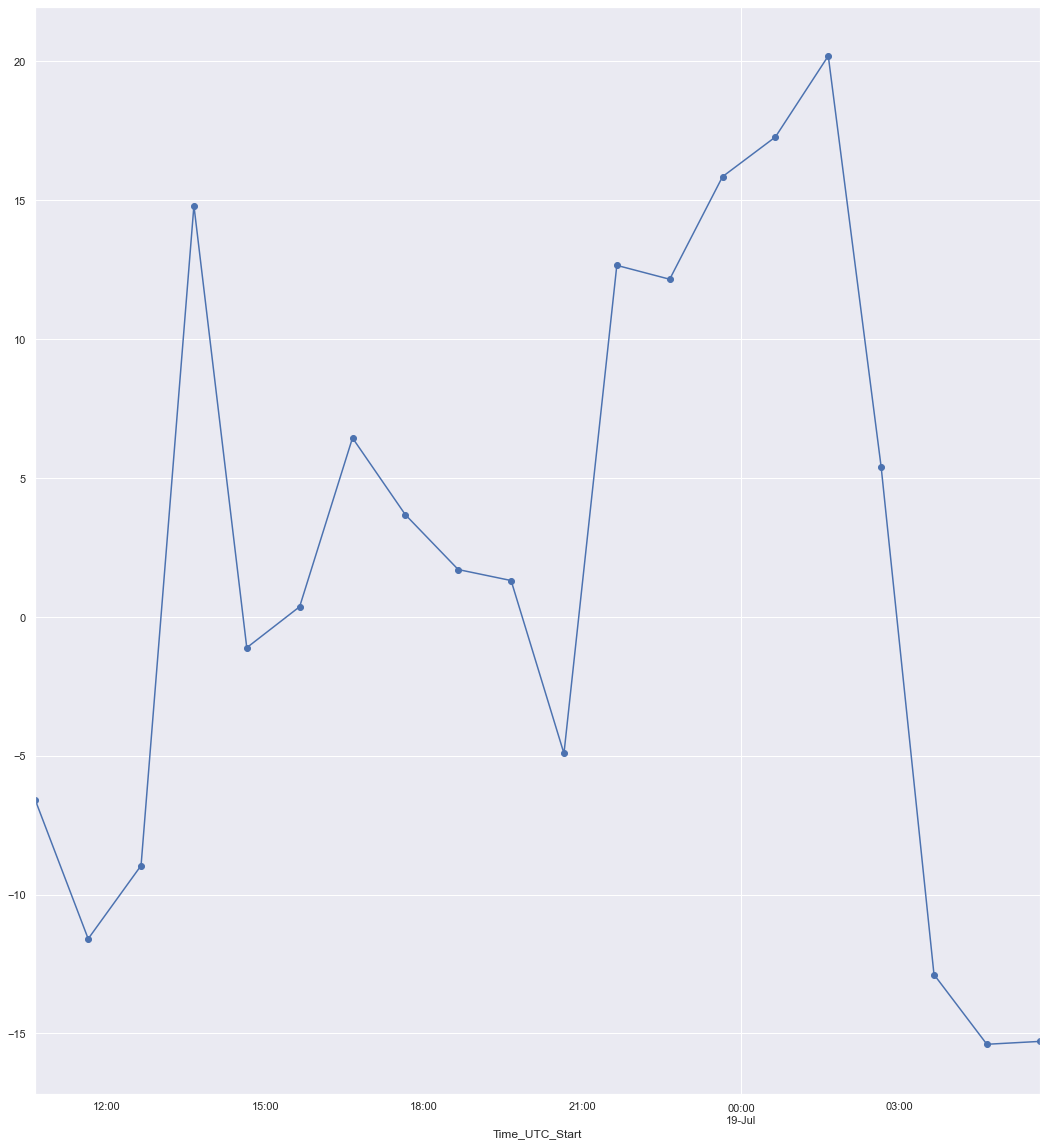

In [16]:
result.seasonal[:20].plot(marker = "o")
plt.show()

# Smoothing the Time Series (Moving Averages)

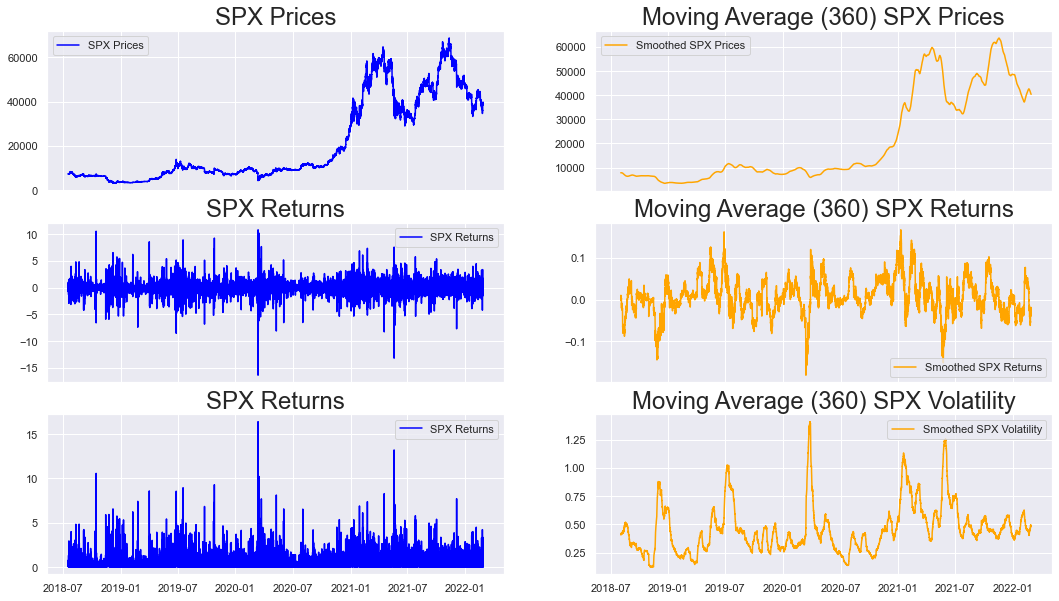

In [17]:
# Setting the Plot size
plt.rcParams["figure.figsize"] = 18, 10

# Defining the number of subplots. sharex = True enables the plots to share their x axis and its labels
fig, ax = plt.subplots(3, 2, sharex = True)

# Plots for Moving Average (window = 360) of S&P 500 Prices 
ax[0, 0].plot(train_df.spx, color = "blue", label = "SPX Prices")
ax[0, 0].set_title("SPX Prices", size = 24)
ax[0, 0].legend()

ax[0, 1].plot(train_df.spx.rolling(window=360).mean(), color = "orange", label = "Smoothed SPX Prices")
ax[0, 1].set_title("Moving Average (360) SPX Prices", size = 24)
ax[0, 1].legend()

# Plots for Moving Average (window = 360) of S&P 500 Returns
ax[1, 0].plot(train_df.spx_ret[1:], color = "blue", label = "SPX Returns")
ax[1, 0].set_title("SPX Returns", size = 24)
ax[1, 0].legend()

ax[1, 1].plot(train_df.spx_ret[1:].rolling(window=360).mean(), color = "orange", label = "Smoothed SPX Returns")
ax[1, 1].set_title("Moving Average (360) SPX Returns", size = 24)
ax[1, 1].legend()

# Plots for Moving Average (window = 360) of S&P 500 Volatility
ax[2, 0].plot(train_df.spx_vol[1:], color = "blue", label = "SPX Returns")
ax[2, 0].set_title("SPX Returns", size = 24)
ax[2, 0].legend()

ax[2, 1].plot(train_df.spx_vol[1:].rolling(window=360).mean(), color = "orange", label = "Smoothed SPX Volatility")
ax[2, 1].set_title("Moving Average (360) SPX Volatility", size = 24)
ax[2, 1].legend()

# Displaying Plots
plt.show()

# Correlation Plots (ACF and PACF)

C:\Users\Nguyen The Minh Duc\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(
C:\Users\Nguyen The Minh Duc\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(
C:\Users\Nguyen The Minh Duc\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker

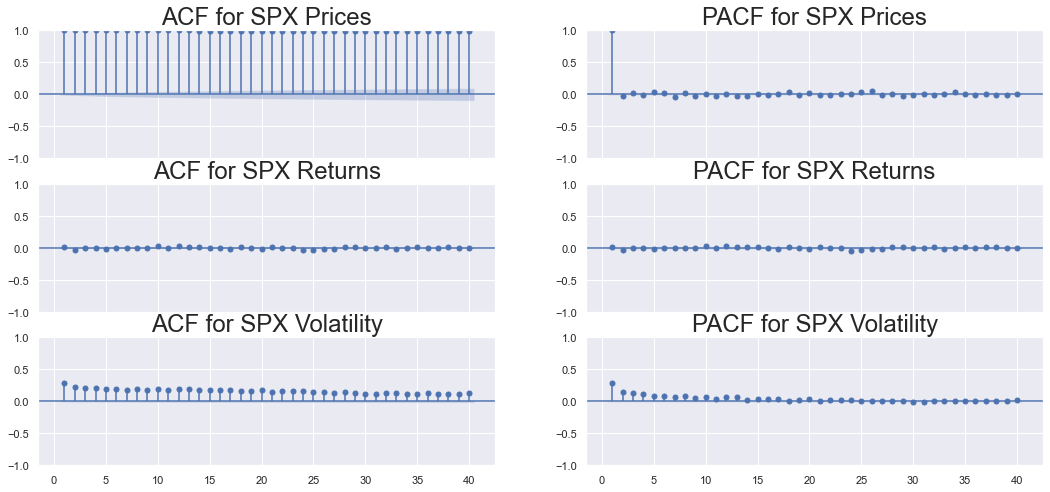

In [18]:
# Importing the required packages
import statsmodels.graphics.tsaplots as sgt

# Setting the size of the figure
plt.rcParams["figure.figsize"] = 18, 8

# Defining the subplots with shared x-axis
fig, axes = plt.subplots(3, 2, sharex = True)

# Plotting ACF for S&P 500 Prices, Returns and Volatility
sgt.plot_acf(train_df.spx, zero = False, lags = 40, ax = axes[0, 0])
sgt.plot_acf(train_df.spx_ret[1:], zero = False, lags = 40, ax = axes[1, 0])
sgt.plot_acf(train_df.spx_vol[1:], zero = False, lags = 40, ax = axes[2, 0])

axes[0, 0].set_title("ACF for SPX Prices", size = 24)
axes[1, 0].set_title("ACF for SPX Returns", size = 24)
axes[2, 0].set_title("ACF for SPX Volatility", size = 24)

# Plotting PACF for S&P 500 Prices, Returns and Volatility
sgt.plot_pacf(train_df.spx, zero = False, lags = 40, ax = axes[0, 1])
sgt.plot_pacf(train_df.spx_ret[1:], zero = False, lags = 40, ax = axes[1, 1])
sgt.plot_pacf(train_df.spx_vol[1:], zero = False, lags = 40, ax = axes[2, 1])

axes[0, 1].set_title("PACF for SPX Prices", size = 24)
axes[1, 1].set_title("PACF for SPX Returns", size = 24)
axes[2, 1].set_title("PACF for SPX Volatility", size = 24)

# Displaying the plots
plt.show()

# Visual Inspection

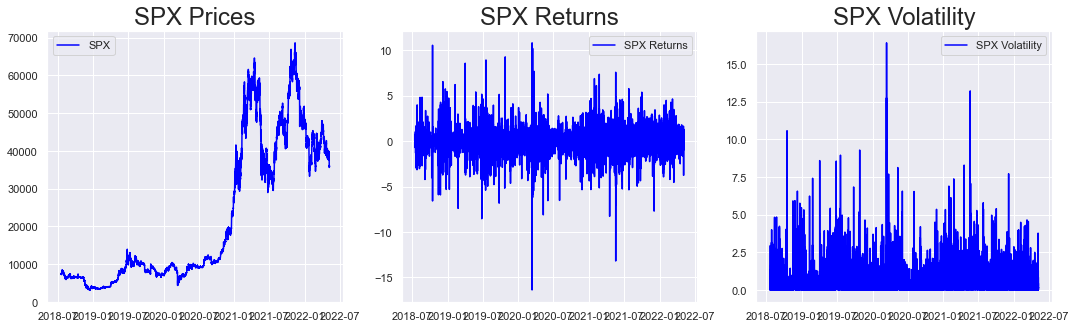

In [19]:
# Setting the figure size 
plt.rcParams["figure.figsize"] = (18, 5)

# Subdividing the figure into 3 figures stacked in 1 row
fig, ax = plt.subplots(1, 3)

# First Plot - S&P 500 prices against time
ax[0].plot(data.spx, color = "blue", label = "SPX")
ax[0].set_title("SPX Prices", size = 24)
ax[0].legend()

# Second Plot - S&P 500 returns against time
ax[1].plot(data.spx_ret, color = "blue", label = "SPX Returns")
ax[1].set_title("SPX Returns", size = 24)
ax[1].legend()

# Third Plot - S&P 500 volatility against time
ax[2].plot(data.spx_vol, color = "blue", label = "SPX Volatility")
ax[2].set_title("SPX Volatility", size = 24)
ax[2].legend()

# Used to display the plot free from any additional text in Jupyter notebooks
plt.show()

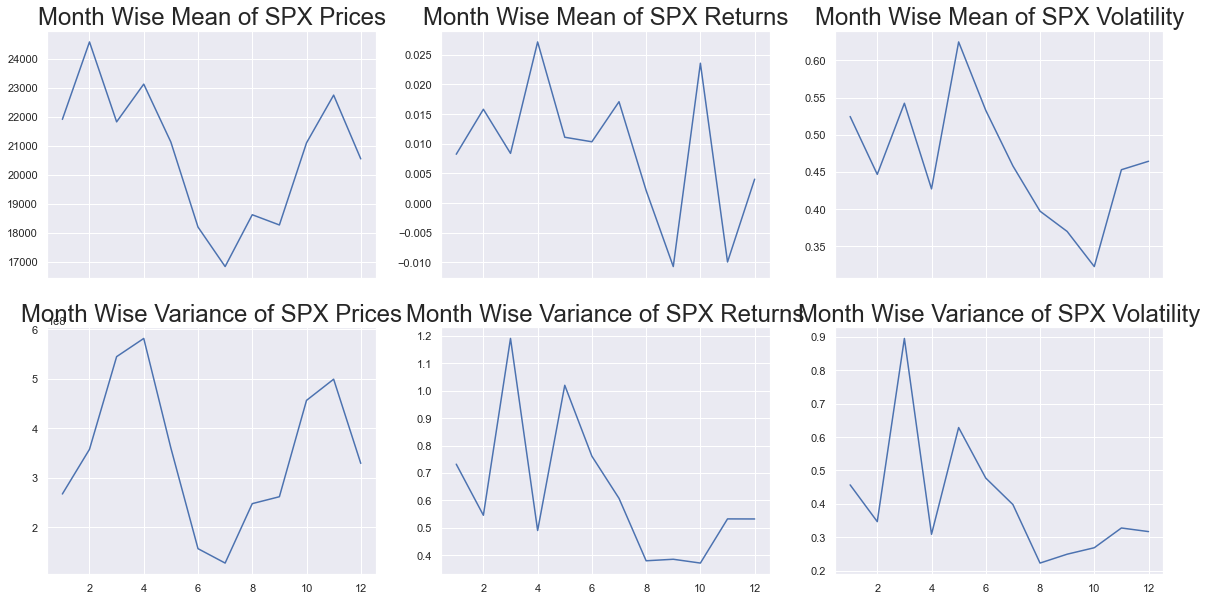

In [21]:
# Building dataframes to store yearly mean and variance
mean_df = train_df.groupby(by = train_df.index.month).mean()
var_df = train_df.groupby(by = train_df.index.month).var()

# Setting the figure size
plt.rcParams["figure.figsize"] = 20, 10

# Defining the subplots with shared x-axis
fig, ax = plt.subplots(2, 3, sharex = True)

# PLotting mean for the 3 series in the first row
ax[0, 0].plot(mean_df.spx)
ax[0, 1].plot(mean_df.spx_ret)
ax[0, 2].plot(mean_df.spx_vol)

# Setting title for the first row of plots
ax[0, 0].set_title("Month Wise Mean of SPX Prices", size = 24)
ax[0, 1].set_title("Month Wise Mean of SPX Returns", size = 24)
ax[0, 2].set_title("Month Wise Mean of SPX Volatility", size = 24)


# PLotting variance for the 3 series in the second row
ax[1, 0].plot(var_df.spx)
ax[1, 1].plot(var_df.spx_ret)
ax[1, 2].plot(var_df.spx_vol)

# Setting title for the second row of plots
ax[1, 0].set_title("Month Wise Variance of SPX Prices", size = 24)
ax[1, 1].set_title("Month Wise Variance of SPX Returns", size = 24)
ax[1, 2].set_title("Month Wise Variance of SPX Volatility", size = 24)

# Displaying the plots
plt.show()

# Statistical Tests (ADF)

In [24]:

# Importing the necessary package
from statsmodels.tsa.stattools import adfuller

# ADF test in S&P 500 Prices
print(adfuller(train_df["spx"]))

# To apply ADF Test on S&P 500 Returns, use the code line below
print(adfuller(train_df["spx_ret"][1:]))

# To apply ADF Test on S&P 500 volatility, use the code line below
print(adfuller(train_df["spx_vol"][1:]))

(-0.8853775202414976, 0.7927496629093607, 50, 31616, {'1%': -3.430556851942471, '5%': -2.8616314231389044, '10%': -2.566818661717087}, 432309.2854060908)
(-25.225156136459045, 0.0, 50, 31615, {'1%': -3.4305568584858444, '5%': -2.861631426030803, '10%': -2.566818663256373}, 73896.36871933461)
(-12.82594520023764, 6.013670069115652e-24, 50, 31615, {'1%': -3.4305568584858444, '5%': -2.861631426030803, '10%': -2.566818663256373}, 54902.35692285049)


# Non Seasonal Models : ARIMA

C:\Users\Nguyen The Minh Duc\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


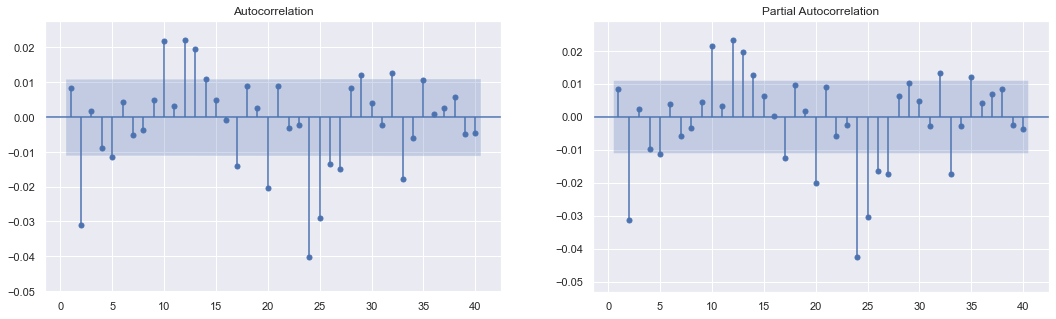

In [29]:
# Importing Required Package
import statsmodels.graphics.tsaplots as sgt

# Fixing plot size
plt.rcParams["figure.figsize"] = 18, 5

# Defining Subplots
fig, axes = plt.subplots(1, 2)

# Plotting ACF and PACF for S&P 500 Returns
sgt.plot_acf(train_df.spx_ret[1:], zero = False, lags = 40, ax = axes[0], auto_ylims = True)
sgt.plot_pacf(train_df.spx_ret[1:], zero = False, lags = 40, ax = axes[1], auto_ylims = True)

# Display the Plot
plt.show()

# Fitting ARIMA(1, 0, 1)

                               SARIMAX Results                                
Dep. Variable:                spx_ret   No. Observations:                31666
Model:               SARIMAX(1, 0, 1)   Log Likelihood              -37078.074
Date:                Fri, 03 Jun 2022   AIC                          74162.147
Time:                        14:14:29   BIC                          74187.236
Sample:                    07-18-2018   HQIC                         74170.177
                         - 02-26-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5875      0.080     -7.357      0.000      -0.744      -0.431
ma.L1          0.6056      0.079      7.670      0.000       0.451       0.760
sigma2         0.6089      0.001    493.087      0.0

C:\Users\Nguyen The Minh Duc\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


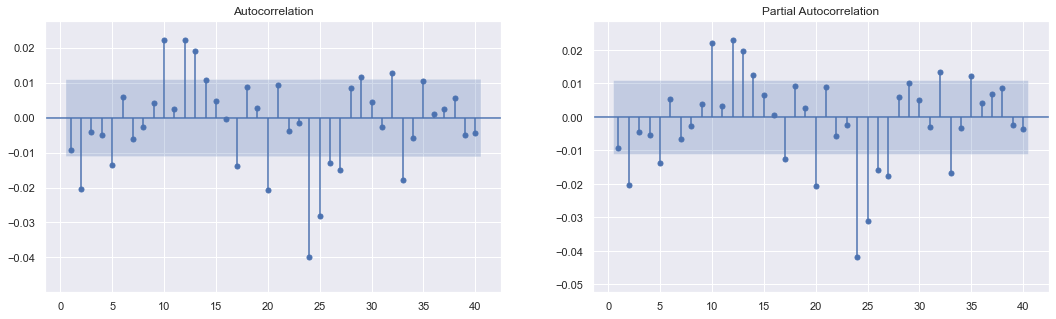

In [28]:
# MODEL FITTING
# Importing Required Package
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Defining the Model
model = SARIMAX(train_df["spx_ret"][1:], order = (1, 0, 1))
# Fitting the Model
model_results = model.fit()

# Printing the model summary
print(model_results.summary())


# EVALUATING RESIDUALS
# Defining the figure size
plt.rcParams["figure.figsize"] = 18, 5

# Defining the subplots 
fig, axes = plt.subplots(1, 2)

# ACF and PACF for residuals of ARIMA(1, 0, 1)
sgt.plot_acf(model_results.resid[1:], zero = False, lags = 40, ax = axes[0],auto_ylims = True)
sgt.plot_pacf(model_results.resid[1:], zero = False, lags = 40, ax = axes[1], auto_ylims= True)

# Displaying the plots
plt.show()

# Seasonal Model: SARIMA